In [1]:
%%time
!pip install --pre dgl -f https://data.dgl.ai/wheels/cu118/repo.html
!pip install --pre dglgo -f https://data.dgl.ai/wheels-test/repo.html
!pip install alignn phonopy

Looking in links: https://data.dgl.ai/wheels/cu118/repo.html
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.9/370.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.8.1
    Uninstalling pydantic-1.8.1:
      Successfully uninstalled pydantic-1.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alignn 2023.7.10 requires pydantic==1.8.1, but you have pydantic 2.1.1 which is incompatible.
inflect 6.0.5 requires pydantic<2,>=1.9.1, but you have pydantic 2.1.1 which is incompatible.
spacy 3.5.4 requires pydantic!=1.8,!=1.8.1,<1.11.0,>=1.7.4, but you have pydantic 2.1.1 which is incompatible.
thinc 8.1.10 requires pydantic!=1.8,!=1.8.1,<1.11.0,>=1.7.4, but you have pydantic 2.

In [ ]:
!unzip "/content/POSCAR_new.zip"

Streaming output truncated to the last 5000 lines.
  inflating: POSCAR_new/POSCAR-mp-1182219.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-1182219.vasp  
  inflating: POSCAR_new/POSCAR-mp-1185026.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-1185026.vasp  
  inflating: POSCAR_new/POSCAR-mp-753269.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-753269.vasp  
  inflating: POSCAR_new/POSCAR-mp-1096568.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-1096568.vasp  
  inflating: POSCAR_new/POSCAR-mp-770509.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-770509.vasp  
  inflating: POSCAR_new/POSCAR-mp-759664.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-759664.vasp  
  inflating: POSCAR_new/POSCAR-mp-1285073.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-1285073.vasp  
  inflating: POSCAR_new/POSCAR-mp-1174033.vasp  
  inflating: __MACOSX/POSCAR_new/._POSCAR-mp-1174033.vasp  
  inflating: POSCAR_new/POSCAR-mp-1236215.vasp  
  inflating: __MACOSX/POSCAR_new/.

In [ ]:
!unzip "/content/fig.zip"

unzip:  cannot find or open /content/fig.zip, /content/fig.zip.zip or /content/fig.zip.ZIP.


In [2]:
import os
!pwd
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('alignn'):
  !git clone https://github.com/usnistgov/alignn.git

os.chdir('alignn')
# Install using setup.py in case pip didn't work
# !python setup.py develop

#!pip install dgl-cu111 # Colab has cuda 11.1

/content
Cloning into 'alignn'...
remote: Enumerating objects: 3969, done.
remote: Counting objects: 100% (1563/1563), done.
remote: Compressing objects: 100% (515/515), done.
remote: Total 3969 (delta 1141), reused 1283 (delta 1001), pack-reused 2406
Receiving objects: 100% (3969/3969), 154.26 MiB | 17.43 MiB/s, done.
Resolving deltas: 100% (2317/2317), done.


In [ ]:
import re

# open your csv and read as a text string
with open('/content/prop_tot_e.csv', 'r') as f:
    my_csv_text = f.read()

find_str = '\ufeff'
replace_str = ''

# substitute
new_csv_str = re.sub(find_str, replace_str, my_csv_text)

# open new file and save
new_csv_path = 'alignn/examples/POSCAR_new/id_prop.csv' # or whatever path and name you want
with open(new_csv_path, 'w') as f:
    f.write(new_csv_str)

In [ ]:
import csv

with open('alignn/examples/POSCAR_new/id_prop.csv', newline='') as f:
  reader = csv.reader(f)
  for row in reader:
    print(row)
    data = [[c.replace('\ufeff', '') for c in row] for row in reader]
    break

['POSCAR-mp-20998.vasp', '-3.016977583']


In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 100 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/config_lit.json" --output_dir=lit_new_tot
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:10<00:00, 28.27it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
from google.colab import files

In [ ]:
files.download('/content/gnn_final.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig1.json" --output_dir=tot_fig_1
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:06<00:00, 28.44it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig2.json" --output_dir=tot_fig_2
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:10<00:00, 28.28it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig3.json" --output_dir=tot_fig_3
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:16<00:00, 27.99it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig4.json" --output_dir=tot_fig_4
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:14<00:00, 28.07it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig5.json" --output_dir=tot_fig_5
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:14<00:00, 28.09it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig6.json" --output_dir=tot_fig_6
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:15<00:00, 28.03it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig7.json" --output_dir=tot_fig_7
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:16<00:00, 27.99it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig8.json" --output_dir=tot_fig_8
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:18<00:00, 27.89it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig9.json" --output_dir=tot_fig_9
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:17<00:00, 27.95it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 50 --batch_size 64 --config "alignn/examples/POSCAR_new/fig/fig10.json" --output_dir=tot_fig_10
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:11<00:00, 28.21it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
!zip -r /content/tot_fig/1.zip /content/alignn/tot_fig_1
!zip -r /content/tot_fig/2.zip /content/alignn/tot_fig_2
!zip -r /content/tot_fig/3.zip /content/alignn/tot_fig_3
!zip -r /content/tot_fig/4.zip /content/alignn/tot_fig_4
!zip -r /content/tot_fig/5.zip /content/alignn/tot_fig_5
!zip -r /content/tot_fig/6.zip /content/alignn/tot_fig_6
!zip -r /content/tot_fig/7.zip /content/alignn/tot_fig_7
!zip -r /content/tot_fig/8.zip /content/alignn/tot_fig_8
!zip -r /content/tot_fig/9.zip /content/alignn/tot_fig_9
!zip -r /content/tot_fig/10.zip /content/alignn/tot_fig_10

  adding: content/alignn/tot_fig_1/ (stored 0%)
  adding: content/alignn/tot_fig_1/checkpoint_49.pt (deflated 8%)
  adding: content/alignn/tot_fig_1/prediction_results_train_set.csv (deflated 57%)
  adding: content/alignn/tot_fig_1/checkpoint_50.pt (deflated 8%)
  adding: content/alignn/tot_fig_1/val_data_data_range (stored 0%)
  adding: content/alignn/tot_fig_1/history_val.json (deflated 53%)
  adding: content/alignn/tot_fig_1/history_train.json (deflated 53%)
  adding: content/alignn/tot_fig_1/train_data_data_range (stored 0%)
  adding: content/alignn/tot_fig_1/ids_train_val_test.json (deflated 85%)
  adding: content/alignn/tot_fig_1/mad (deflated 12%)
  adding: content/alignn/tot_fig_1/test_data_data_range (stored 0%)
  adding: content/alignn/tot_fig_1/prediction_results_test_set.csv (deflated 69%)
  adding: content/alignn/tot_fig_1/config.json (deflated 59%)
  adding: content/alignn/tot_fig_2/ (stored 0%)
  adding: content/alignn/tot_fig_2/checkpoint_49.pt (deflated 8%)
  adding: c

In [ ]:
!zip -r /content/tot_fig.zip /content/tot_fig

updating: content/tot_fig/ (stored 0%)
  adding: content/tot_fig/5.zip (stored 0%)
  adding: content/tot_fig/9.zip (stored 0%)
  adding: content/tot_fig/4.zip (stored 0%)
  adding: content/tot_fig/6.zip (stored 0%)
  adding: content/tot_fig/3.zip (stored 0%)
  adding: content/tot_fig/2.zip (stored 0%)
  adding: content/tot_fig/10.zip (stored 0%)
  adding: content/tot_fig/7.zip (stored 0%)
  adding: content/tot_fig/8.zip (stored 0%)
  adding: content/tot_fig/1.zip (stored 0%)


In [ ]:
files.download("/content/tot_fig.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip /content/gnn_final.zip

Archive:  /content/gnn_final.zip
   creating: gnn_final/
  inflating: gnn_final/form_41.json  
  inflating: __MACOSX/gnn_final/._form_41.json  
  inflating: gnn_final/.DS_Store     
  inflating: __MACOSX/gnn_final/._.DS_Store  
  inflating: gnn_final/form_21.json  
  inflating: __MACOSX/gnn_final/._form_21.json  
  inflating: gnn_final/form_51.json  
  inflating: __MACOSX/gnn_final/._form_51.json  
  inflating: gnn_final/form_11.json  
  inflating: __MACOSX/gnn_final/._form_11.json  
  inflating: gnn_final/form_31.json  
  inflating: __MACOSX/gnn_final/._form_31.json  
  inflating: gnn_final/tot_21.json   
  inflating: __MACOSX/gnn_final/._tot_21.json  
  inflating: gnn_final/tot_41.json   
  inflating: __MACOSX/gnn_final/._tot_41.json  
  inflating: gnn_final/tot_11.json   
  inflating: __MACOSX/gnn_final/._tot_11.json  
  inflating: gnn_final/tot_31.json   
  inflating: __MACOSX/gnn_final/._tot_31.json  
  inflating: gnn_final/tot_51.json   
  inflating: __MACOSX/gnn_final/._tot_51.j

In [ ]:
!ls alignn/examples/POSCAR_new/gnn_final

form_11.json  form_31.json  form_51.json  tot_21.json  tot_41.json
form_21.json  form_41.json  tot_11.json   tot_31.json  tot_51.json


In [ ]:
from google.colab import files

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 300 --batch_size 64 --config "alignn/examples/POSCAR_new/gnn_final/tot_11.json" --output_dir=tot_f11
t2=time.time()
print ('Time in s',t2-t1)

DGL backend not selected or invalid.  Assuming PyTorch for now.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:03<00:00, 28.58it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0

In [ ]:
!zip -r /content/tot_final_11.zip /content/alignn/tot_f11
files.download("/content/tot_final_11.zip")

  adding: content/alignn/tot_f11/ (stored 0%)
  adding: content/alignn/tot_f11/checkpoint_299.pt (deflated 7%)
  adding: content/alignn/tot_f11/prediction_results_train_set.csv (deflated 57%)
  adding: content/alignn/tot_f11/val_data_data_range (stored 0%)
  adding: content/alignn/tot_f11/history_val.json (deflated 56%)
  adding: content/alignn/tot_f11/history_train.json (deflated 55%)
  adding: content/alignn/tot_f11/train_data_data_range (stored 0%)
  adding: content/alignn/tot_f11/ids_train_val_test.json (deflated 85%)
  adding: content/alignn/tot_f11/checkpoint_300.pt (deflated 7%)
  adding: content/alignn/tot_f11/mad (deflated 12%)
  adding: content/alignn/tot_f11/test_data_data_range (stored 0%)
  adding: content/alignn/tot_f11/prediction_results_test_set.csv (deflated 69%)
  adding: content/alignn/tot_f11/config.json (deflated 59%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 300 --batch_size 64 --config "alignn/examples/POSCAR_new/gnn_final/tot_21.json" --output_dir=tot_f21
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:07<00:00, 28.40it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
!zip -r /content/tot_final_21.zip /content/alignn/tot_f21
files.download("/content/tot_final_21.zip")

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 300 --batch_size 64 --config "alignn/examples/POSCAR_new/gnn_final/tot_31.json" --output_dir=tot_f31
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:54<00:00, 26.39it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
!zip -r /content/tot_final_31.zip /content/alignn/tot_f31
files.download("/content/tot_final_31.zip")

  adding: content/alignn/tot_f31/ (stored 0%)
  adding: content/alignn/tot_f31/checkpoint_299.pt (deflated 7%)
  adding: content/alignn/tot_f31/prediction_results_train_set.csv (deflated 58%)
  adding: content/alignn/tot_f31/val_data_data_range (stored 0%)
  adding: content/alignn/tot_f31/history_val.json (deflated 56%)
  adding: content/alignn/tot_f31/history_train.json (deflated 55%)
  adding: content/alignn/tot_f31/train_data_data_range (stored 0%)
  adding: content/alignn/tot_f31/ids_train_val_test.json (deflated 85%)
  adding: content/alignn/tot_f31/checkpoint_300.pt (deflated 7%)
  adding: content/alignn/tot_f31/mad (deflated 12%)
  adding: content/alignn/tot_f31/test_data_data_range (stored 0%)
  adding: content/alignn/tot_f31/prediction_results_test_set.csv (deflated 69%)
  adding: content/alignn/tot_f31/config.json (deflated 59%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 300 --batch_size 64 --config "alignn/examples/POSCAR_new/gnn_final/tot_41.json" --output_dir=tot_f41
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:53<00:00, 26.40it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
!zip -r /content/tot_final_41.zip /content/alignn/tot_f41
files.download("/content/tot_final_41.zip")

  adding: content/alignn/tot_f41/ (stored 0%)
  adding: content/alignn/tot_f41/checkpoint_299.pt (deflated 7%)
  adding: content/alignn/tot_f41/prediction_results_train_set.csv (deflated 57%)
  adding: content/alignn/tot_f41/val_data_data_range (stored 0%)
  adding: content/alignn/tot_f41/history_val.json (deflated 56%)
  adding: content/alignn/tot_f41/history_train.json (deflated 55%)
  adding: content/alignn/tot_f41/train_data_data_range (stored 0%)
  adding: content/alignn/tot_f41/ids_train_val_test.json (deflated 85%)
  adding: content/alignn/tot_f41/checkpoint_300.pt (deflated 7%)
  adding: content/alignn/tot_f41/mad (deflated 12%)
  adding: content/alignn/tot_f41/test_data_data_range (stored 0%)
  adding: content/alignn/tot_f41/prediction_results_test_set.csv (deflated 69%)
  adding: content/alignn/tot_f41/config.json (deflated 59%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/POSCAR_new" --epochs 300 --batch_size 64 --config "alignn/examples/POSCAR_new/gnn_final/tot_51.json" --output_dir=tot_f51
t2=time.time()
print ('Time in s',t2-t1)

MAX val: -0.19299648
MIN val: -10.88988953
MAD: 1.1346488602531755
Baseline MAE: 1.1271497766349177
data range -0.19299648 -10.88988953
100% 17260/17260 [10:12<00:00, 28.19it/s]
df                                                    atoms  ...    target
0      {'lattice_mat': [[2.47450345, -4.28596681, -0....  ... -3.016978
1      {'lattice_mat': [[2.974031, 0.0, 0.0], [-1.193...  ... -6.896493
2      {'lattice_mat': [[8.803145, 0.0, 0.0], [0.0, 5...  ... -8.043878
3      {'lattice_mat': [[3.015545, 0.0, 0.0], [1.0634...  ... -6.478302
4      {'lattice_mat': [[2.990613, 0.0, 0.0], [-1.165...  ... -7.061443
...                                                  ...  ...       ...
17255  {'lattice_mat': [[3.074548, 0.0, 0.0], [0.0, 5...  ... -7.108005
17256  {'lattice_mat': [[-7.55184, 0.0, 0.0], [-0.296...  ... -5.894123
17257  {'lattice_mat': [[-3.923941, 3.946152, 5.50693...  ... -4.051162
17258  {'lattice_mat': [[3.75249, 0.0, 0.0], [0.0, 3....  ... -6.194913
17259  {'lattice_mat': [[6.

In [ ]:
!zip -r /content/tot_final_51.zip /content/alignn/tot_f51
files.download("/content/tot_final_51.zip")

  adding: content/alignn/tot_f51/ (stored 0%)
  adding: content/alignn/tot_f51/checkpoint_299.pt (deflated 7%)
  adding: content/alignn/tot_f51/prediction_results_train_set.csv (deflated 58%)
  adding: content/alignn/tot_f51/val_data_data_range (stored 0%)
  adding: content/alignn/tot_f51/history_val.json (deflated 56%)
  adding: content/alignn/tot_f51/history_train.json (deflated 55%)
  adding: content/alignn/tot_f51/train_data_data_range (stored 0%)
  adding: content/alignn/tot_f51/ids_train_val_test.json (deflated 85%)
  adding: content/alignn/tot_f51/checkpoint_300.pt (deflated 7%)
  adding: content/alignn/tot_f51/mad (deflated 12%)
  adding: content/alignn/tot_f51/test_data_data_range (stored 0%)
  adding: content/alignn/tot_f51/prediction_results_test_set.csv (deflated 69%)
  adding: content/alignn/tot_f51/config.json (deflated 59%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd

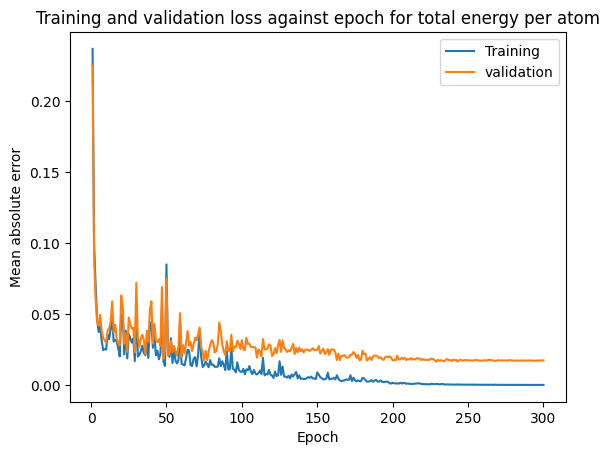

In [6]:
df = pd.DataFrame()
df1 = pd.read_json("/content/alignn/alignn/tot_f11/history_train.json")
df2 = pd.read_json("/content/alignn/alignn/tot_f11/history_val.json")

df["Training"]=df1.iloc[:,0]
df["validation"]=df2.iloc[:,0]

list = []
calc = 1

while int(calc) < 301:
    list.append(calc)
    calc = int(calc) + 1
df["Epoch"]=list

import matplotlib.pyplot as plt

df.plot(x="Epoch", y=["Training", "validation"],ylabel="Mean absolute error",title="Training and validation loss against epoch for total energy per atom")
plt.show()

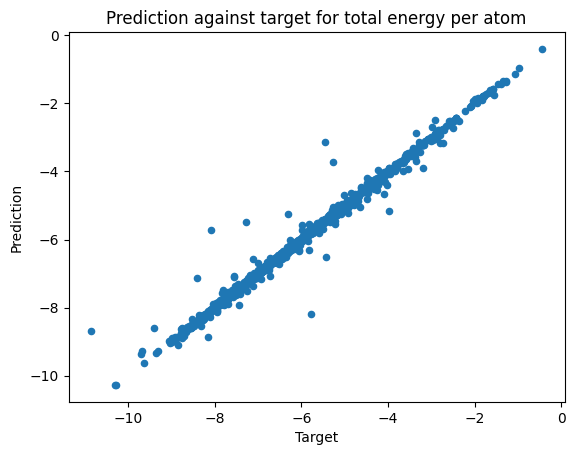

The r2 value is: 0.9908478602253813


In [7]:
df_form = pd.read_csv("/content/alignn/alignn/tot_f11/prediction_results_test_set.csv")

df_form.plot(x="target",y="prediction",kind="scatter",xlabel="Target",ylabel="Prediction",title="Prediction against target for total energy per atom")
plt.show()

from sklearn.metrics import r2_score

print("The r2 value is:",r2_score(df_form["target"], df_form["prediction"]))